<a href="https://colab.research.google.com/github/MarcosRMG/Bootecamp-Alura-Data-Science/blob/main/M%C3%B3dulo_3_Analise_descritiva_e_testes_estatisticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autor: Marcos Galvão

[Linkedin](https://br.linkedin.com/in/marcosrmgalvao)

[Github](https://github.com/MarcosRMG)

# **Bibliotecas**

In [ ]:
import pandas as pd
from zipfile import ZipFile
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

# **Dados**

In [ ]:
caminho_drive = '/content/drive/MyDrive/Data Science/Bootcamp/Modulo 3/PeNSE_2015_AMOSTRA2.zip'

zip = ZipFile(caminho_drive)
caminho_zip = zip.namelist()[1]

dados = pd.read_csv(zip.open(caminho_zip), sep=';', decimal=',')

questionario_aluno_df = pd.read_excel('/content/drive/MyDrive/Data Science/Bootcamp/Modulo 3/Dicionario_PENSE_Microdados_AMOSTRA2.xls')

In [ ]:
zip.namelist()[1]

'arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV'

In [ ]:
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296


In [ ]:
dados.shape

(16556, 181)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(10), int64(171)
memory usage: 22.9 MB


# **1 Educação, saúde e tipos de dados**

##Desafio 01 - Descompactar a pasta zipada usando outro método (Dica Allan, é utilizar comandos Bash).

Utilizando o comando unzip e passando o endereço do arquivo zipado é possível fazer a descompactação. 

!unzip arquivo - descompacta
!unzip -l arquivo - mostra os arquivos dentro da pasta

In [ ]:
#Visualizacao
! unzip -l drive/MyDrive/Data\ Science/Bootcamp/'Modulo 3'/PeNSE_2015_AMOSTRA2.zip

Archive:  drive/MyDrive/Data Science/Bootcamp/Modulo 3/PeNSE_2015_AMOSTRA2.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
        0  2018-03-19 11:42   arquivos csv/
  7262170  2018-03-19 11:26   arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV
 11420533  2018-03-19 11:28   arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV
  5000642  2018-03-19 11:28   arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV
        0  2018-03-19 11:43   arquivos sas/
 24691712  2018-03-19 11:19   arquivos sas/pense_amostra2_aluno.sas7bdat
 45253632  2018-03-19 11:19   arquivos sas/pense_amostra2_alunoescola.sas7bdat
 18105344  2018-03-19 11:19   arquivos sas/pense_amostra2_escola.sas7bdat
        0  2018-03-19 11:46   arquivos xlsx/
 11757246  2018-03-19 11:25   arquivos xlsx/PENSE_AMOSTRA2_ALUNO.xlsx
 18732739  2018-03-19 11:27   arquivos xlsx/PENSE_AMOSTRA2_ALUNOESCOLA.xlsx
  7159579  2018-03-19 11:28   arquivos xlsx/PENSE_AMOSTRA2_ESCOLA.xlsx
   144896  2018-04-18 10:40   Dicionario_PENSE_Microdados_AMOSTR

##Desafio 02 - Estudar sobre a base de dados que vamos trabalhar. (PeNSE - 2015 Amostra 2)

A Pesquisa Nacional de Saúde do Escolar - PeNSE é uma pesquisa por amostragem tendo como base o cadastro das escolas públicas e privadas do Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira -  INEP. 
A coleta de dados é eventual e foi realizada nos anos de 2009, 2012 e 2015 por meio da parceria com o Ministério da Saúde e apoio do Ministério da Educação. 
A pesquisa tem como objetivo o fornecimento de informação para monitoramento por parte do Sistema de Vigilância de Fatores de Risco de Doênças Crônicas não Transmissíveis do Ministério da Saúde.

A segunda amostra referem-se a "dados passíveis de comparação com indicadores nacionais e internacionais sobre adolescentes e possibilita, entre outros aspectos, melhor identificação e acompanhamento de fatores relacionados ao desenvolvimento físico-biológico e ao tempo de exposição às condições de risco para esse grupo" (IBGE, 2020).

Amostra: "Escolares na faixa etária de 13 a 17 anos (frequentando as etapas do 6º ao 9º ano do ensino fundamental e da 1ª a 3ª série do ensino médio)" (IBGE, 2020).


Referência: IBGE. Pesquisa Nacional de Saúde do Escolar - PeNSE. Disponível em: https://www.ibge.gov.br/estatisticas/sociais/educacao/9134-pesquisa-nacional-de-saude-do-escolar.html?=&t=o-que-e. Acesso em: 02 Dez. 2020.

##Desafio 03 - Classificar algumas perguntas como QualitativaXQuantitativa

In [ ]:
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296


###Qualitativa

####Ordinal

In [ ]:
#Qual é o mês do seu aniversário?
dados['VB01004'].unique()

array([ 7,  4,  6,  9, 12,  3,  8,  5, 10,  1, 11,  2, 99])

Os numeros na questao VB01004 representam os meses do ano que seguem a ordenacao padrao do calendario.

####Nominal

Sexo

In [ ]:
#Qual é o seu sexo?
dados['VB01001']

0        2
1        2
2        1
3        1
4        1
        ..
16551    2
16552    1
16553    1
16554    1
16555    1
Name: VB01001, Length: 16556, dtype: int64

Regiao Geografica

In [ ]:
dados['REGEOGR'].unique()

array([1, 2, 3, 4, 5])

Sao do tipo qualitativa nominal pois os numeros representam uma classificacao (masculino e feminino, norte, sul) e a diferenca numerica nao e relavante, sendo utillizada por conveniencia.

###Quantitativa

####Continuo

In [ ]:
#Em que ano você nasceu?
dados['VB01005'].unique()

array([ 7,  6,  5,  8,  4, 10,  9,  3,  2,  1, 99])

A questao VB01005 e quantitativa continua por representar uma marcacao numerica sequencial.

####Discreto

In [ ]:
#Qual é a sua idade?
dados['VB01003'].unique()

array([13, 14, 15, 16, 11, 12, 17, 18, 19])

A questao VB01003 e quantitativa discreta por nao considrar o espaco de um aniversario e outro, como meses, dias, horas etc.

# **2 Dados qualitativos e tabelas de frequência**

##Desafio 4 - Criar uma função para gerar as tabelas de frequência e fazer a análise de outras informações. Compartilhar no discord suas análises

###Função

In [ ]:
def tabela_frequencia(dados: pd.DataFrame, titulo_eixo: str, 
                      dicionario_respostas: dict):
  frequencia = dados.value_counts()
  proporcao = round(dados.value_counts(normalize=True) * 100, 0).astype('int64')
  tabela = pd.DataFrame({
      'Frequência': frequencia,
      'Proporção (%)': proporcao
  })
  tabela.rename_axis(titulo_eixo, inplace=True)
  tabela.rename(index=dicionario_respostas, inplace=True)
  return tabela

In [ ]:
def tabela_frequencia_continuo(dados: pd.DataFrame, titulo_eixo: str):
  frequencia = dados.value_counts()
  proporcao = round(dados.value_counts(normalize=True) * 100, 0).astype('int64')
  tabela = pd.DataFrame({
      'Frequência': frequencia,
      'Proporção (%)': proporcao
  })
  tabela.rename_axis(titulo_eixo, inplace=True)
  return tabela

###Regiões

In [ ]:
dic_regioes = {
    1: 'Norte',
    2: 'Nordeste',
    3: 'Sudeste',
    4: 'Sul',
    5: 'Centro-Oeste'
}

In [ ]:
regioes = tabela_frequencia(dados['REGEOGR'], 'Respondentes por Região', dic_regioes)

In [ ]:
regioes

,Frequência,Proporção (%)
Respondentes por Região,,
Nordeste,3465,21
Centro-Oeste,3420,21
Sudeste,3276,20
Sul,3207,19
Norte,3188,19


### Possui Carro

In [ ]:
possui_carro = {
  1:	'Sim',
  2:	'Não',
  99:	'Não informado'
}

In [ ]:
carro = tabela_frequencia(dados['VB01017'], 'Possui Carro', possui_carro)

In [ ]:
carro

,Frequência,Proporção (%)
Possui Carro,,
Sim,10179,61
Não,6355,38
Não informado,22,0


###Fome

In [ ]:
ficou_fome = {
    1:	'Nunca',
    2:	'Raramente',
    3:	'Às vezes',
    4:	'Na maior parte das vezes',
    5:	'Sempre',
    99:	'Não informado'}

In [ ]:
ficou_fome_frequencia = tabela_frequencia(dados['VB02024'], 
                                          'Ficou com fome por falta de comida em casa',
                                          ficou_fome)

In [ ]:
ficou_fome_frequencia

,Frequência,Proporção (%)
Ficou com fome por falta de comida em casa,,
Nunca,12825,77
Raramente,1786,11
Às vezes,1443,9
Na maior parte das vezes,253,2
Sempre,219,1
Não informado,30,0


###Altura

In [ ]:
altura_dic = {
    0.998:	'Não informado',
    9.999:	'Recusa ou impossibilidade de medição'
}

In [ ]:
altura = tabela_frequencia(dados['VB17002'] / 1000, 'Altura (M)', altura_dic)

In [ ]:
altura

,Frequência,Proporção (%)
Altura (M),,
Não informado,385,2
Recusa ou impossibilidade de medição,265,2
1.6,186,1
1.62,153,1
1.57,146,1
...,...,...
1.176,1,0
0.142,1,0
1.22,1,0


In [ ]:
tabela_frequencia_continuo(dados['VB17004'] / 100, 'Altura (M)')

,Frequência,Proporção (%)
Altura (M),,
1.600,197,1
1.620,164,1
1.570,155,1
1.550,154,1
1.610,153,1
...,...,...
1.891,1,0
1.339,1,0
1.864,1,0


###Peso

In [ ]:
peso = tabela_frequencia_continuo(dados['VB17003'], 'Peso')

In [ ]:
peso

,Frequência,Proporção (%)
Peso,,
50.0,73,0
53.5,67,0
50.2,66,0
52.5,65,0
51.9,65,0
...,...,...
133.1,1,0
108.0,1,0
93.6,1,0


#Método cut

In [ ]:
dados['imc'] = round(dados['VB17003'] / (dados['VB17004'] / 100) ** 2, 2)

In [ ]:
dados['imc']

0        15.05
1        21.73
2        18.50
3        23.32
4        28.12
         ...  
16551    20.11
16552    17.93
16553    23.97
16554    19.00
16555    23.30
Name: imc, Length: 16556, dtype: float64

In [ ]:
classes_imc = [0, 16.99, 18.49, 24.99, 29.99, 34.99, 39.99, 60]
labels = ['Muito abaixo do peso', 'Abaixo do peso', 'Peso normal', 
          'Acima do peso', 'Obesidade I', 'Obesidade II (severa)',
          'Obesidade III (móribida)']

dados['classificacao_imc'] = pd.cut(dados['imc'],
                                    labels=labels,
                                    bins=classes_imc,
                                    include_lowest=True) 

In [ ]:
dados[['imc', 'classificacao_imc']]

,imc,classificacao_imc
0,15.05,Muito abaixo do peso
1,21.73,Peso normal
2,18.50,Peso normal
3,23.32,Peso normal
4,28.12,Acima do peso
...,...,...
16551,20.11,Peso normal
16552,17.93,Abaixo do peso
16553,23.97,Peso normal
16554,19.00,Peso normal


In [ ]:
frequencia_imc_classificacao = tabela_frequencia_continuo(dados['classificacao_imc'],
                                                 'Classificacao IMC')

In [ ]:
frequencia_imc_classificacao

,Frequência,Proporção (%)
Classificacao IMC,,
Peso normal,9192,56
Abaixo do peso,2559,15
Muito abaixo do peso,2409,15
Acima do peso,1762,11
Obesidade I,489,3
Obesidade II (severa),103,1
Obesidade III (móribida),42,0


# **3 Frequência em dados contínuos e pandas crosstab**

##Desafio 5 - Criar uma tabela de frequência para o peso seguindo a regra de Sturges.

In [ ]:
tamanho_amostra = len(dados)

k = int(1 + ((10/3) * np.log10(tamanho_amostra)))

dados['altura_classes'] = pd.cut(x=dados['VB17004'] / 100, bins=k)

frequencia_altura = tabela_frequencia_continuo(dados['altura_classes'], 
                                               'Altura (M)')

In [ ]:
frequencia_altura

,Frequência,Proporção (%)
Altura (M),,
"(1.573, 1.621]",3110,19
"(1.526, 1.573]",2734,17
"(1.621, 1.668]",2550,15
"(1.668, 1.716]",2063,12
"(1.478, 1.526]",1782,11
"(1.716, 1.763]",1416,9
"(1.431, 1.478]",1012,6
"(1.763, 1.811]",749,5
"(1.383, 1.431]",484,3


##Desafio 6 - Criar outros CrossTabs para analisar outras variáveis, além das abordadas em aulas. Pesquisar sobre o parâmetro aggfunc e testar em pelo menos uma tabela criada.

###Constrangimento com o questionário

In [ ]:
sim_nao = {
    1:	'Sim',
    2:	'Não',
    99: 'Não informado'
}

In [ ]:
constrangimento = tabela_frequencia(dados['VB16001A08'], 
                                    'Você achou este questionário constrangedor?',
                                    sim_nao) 

In [ ]:
constrangimento

,Frequência,Proporção (%)
Você achou este questionário constrangedor?,,
Não,16285,98
Sim,189,1
Não informado,82,0


In [ ]:
constrangimento_cruzado = round(pd.crosstab(dados['VB16001A08'], dados['VB01001'],
                                      normalize='columns') * 100, 0)
constrangimento_cruzado.rename(index=sim_nao, inplace=True)
constrangimento_cruzado.rename(columns={1: 'Masculino', 2: 'Feminino'}, inplace=True)
constrangimento_cruzado

VB01001,Masculino,Feminino
VB16001A08,,
Sim,1.0,1.0
Não,98.0,99.0
Não informado,1.0,0.0


In [ ]:
constrangimento_cruzado = round(pd.crosstab(dados['VB16001A08'], dados['VB01001'],
                                      normalize='index') * 100, 0)
constrangimento_cruzado.rename(index=sim_nao, inplace=True)
constrangimento_cruzado.rename(columns={1: 'Masculino', 2: 'Feminino'}, inplace=True)
constrangimento_cruzado

VB01001,Masculino,Feminino
VB16001A08,,
Sim,60.0,40.0
Não,50.0,50.0
Não informado,67.0,33.0


A normalização pode ser feita pela linha, pela coluna ou pela frequência total.

###Perspectiva

####Por sexo

In [ ]:
dic_perspectiva = {
    1:	'Somente continuar estudando',
    2:	'Somente trabalhar',
    3:	'Continuar estudando e trabalhar',
    4:	'Seguir outro plano',
    5:	'Não sei',
    99:	'Não informado'
}

In [ ]:
perspectiva_sexo = round(pd.crosstab(dados['VB01026'], dados['VB01001'], 
                               normalize='columns', colnames=['Sexo'],
                               rownames=['Quando terminar o ciclo/curso que você está frequentando atualmente, você pretende?']) * 100, 0)
perspectiva_sexo.rename(index=dic_perspectiva, inplace=True)
perspectiva_sexo.rename(columns={1: 'Masculino', 2: 'Feminino'}, inplace=True)
perspectiva_sexo

Sexo,Masculino,Feminino
"Quando terminar o ciclo/curso que você está frequentando atualmente, você pretende?",,
Somente continuar estudando,15.0,15.0
Somente trabalhar,9.0,5.0
Continuar estudando e trabalhar,61.0,69.0
Seguir outro plano,7.0,5.0
Não sei,8.0,6.0
Não informado,0.0,0.0


Para maioria de ambos os sexos a perspectiva é continuar estudando e trabalhar ou continuar estudando.

####Por Região

In [ ]:
perspectiva_regioes = round(pd.crosstab(dados['VB01026'], dados['REGEOGR'], 
                               normalize='columns', colnames=['Regiões'],
                               rownames=['Quando terminar o ciclo/curso que você está frequentando atualmente, você pretende?']) * 100, 0)
perspectiva_regioes.rename(index=dic_perspectiva, inplace=True)
perspectiva_regioes.rename(columns=dic_regioes, inplace=True)
perspectiva_regioes

Regiões,Norte,Nordeste,Sudeste,Sul,Centro-Oeste
"Quando terminar o ciclo/curso que você está frequentando atualmente, você pretende?",,,,,
Somente continuar estudando,17.0,17.0,13.0,11.0,16.0
Somente trabalhar,6.0,7.0,8.0,8.0,6.0
Continuar estudando e trabalhar,62.0,64.0,66.0,68.0,66.0
Seguir outro plano,7.0,6.0,6.0,5.0,6.0
Não sei,8.0,7.0,6.0,8.0,7.0
Não informado,0.0,0.0,0.0,0.0,0.0


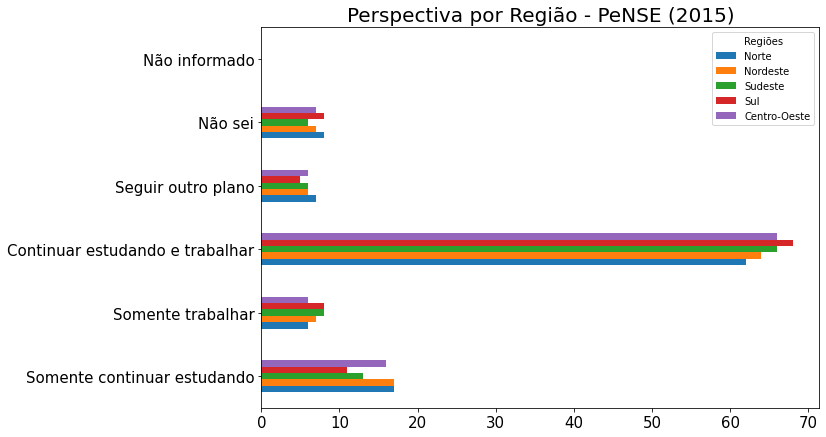

In [ ]:
perspectiva_regioes.plot(kind='barh', figsize=(10, 7), fontsize=15)
plt.ylabel('')
plt.title('Perspectiva por Região - PeNSE (2015)', fontsize=20)
plt.show()

####Pretensão de escolaridade

In [ ]:
dic_pretensao_escolaridade = {
1:	'Ensino Fundamental', 
2:	'Ensino Médio',
3:	'Ensino Médio Técnico',
4:	'Ensino Superior',
5:	'Pós-graduação',
6:	'Não sei',
99:	'Não informado'}

In [ ]:
pretensao_escolaridade = round(pd.crosstab(dados['VB01025'], dados['VB01001'], normalize='columns',
                  rownames=['Qual o grau de escolaridade mais elevado que você pretendo concluir?'],
                  colnames=['Sexo']
                  ) * 100, 0)

pretensao_escolaridade.rename(index=dic_pretensao_escolaridade, inplace=True)
pretensao_escolaridade.rename(columns={1: 'Masculino', 2: 'Feminino'}, inplace=True)
pretensao_escolaridade

Sexo,Masculino,Feminino
Qual o grau de escolaridade mais elevado que você pretendo concluir?,,
Ensino Fundamental,10.0,7.0
Ensino Médio,11.0,9.0
Ensino Médio Técnico,5.0,3.0
Ensino Superior,16.0,15.0
Pós-graduação,38.0,47.0
Não sei,21.0,19.0
Não informado,0.0,0.0


####Aggfunc - média da altura

In [ ]:
dic_idade = {
    11:	'11 anos ou menos',
    12:	'12 anos',
    13:	'13 anos',
    14:	'14 anos',
    15:	'15 anos',
    16:	'16 anos',
    17:	'17 anos',
    18:	'18 anos',
    19:	'19 anos ou mais'
}

In [ ]:
media_altura = round(pd.crosstab(dados['VB01003'], dados['VB01001'], 
                           values=dados['VB17004'], 
                           rownames=['Qual a sua idade?'], colnames=['Sexo'], 
                           aggfunc='mean') / 100, 2)

media_altura.rename(index=dic_idade, inplace=True)
media_altura.rename(columns={1: 'Masculino', 2: 'Feminino'}, inplace=True)
media_altura

Sexo,Masculino,Feminino
Qual a sua idade?,,
11 anos ou menos,1.48,1.50
12 anos,1.54,1.55
13 anos,1.61,1.58
14 anos,1.66,1.59
15 anos,1.70,1.61
16 anos,1.72,1.60
17 anos,1.74,1.61
18 anos,1.73,1.59
19 anos ou mais,1.72,1.59


####Cuidado com o peso

In [ ]:
dic_cuidado_peso = {
1:	'Não estou fazendo nada',
2:	'Estou tentando perder peso',
3:	'Estou tentando ganhar peso',
4:	'Estou tentando manter o mesmo peso',
99:	'Não informado'}

In [ ]:
cuidado_peso = pd.crosstab(dados['VB11002'], dados['VB01001'], 
                           values=dados['VB17003'], 
                           rownames=['O que você está fazendo em relação a seu peso?'], colnames=[''], 
                           aggfunc='mean')

cuidado_peso.rename(index=dic_cuidado_peso, inplace=True)
cuidado_peso.rename(columns={1: 'Masculino', 2: 'Feminino'}, inplace=True)
cuidado_peso

,Masculino,Feminino
O que você está fazendo em relação a seu peso?,,
Não estou fazendo nada,54.750124,50.273315
Estou tentando perder peso,65.585540,60.234523
Estou tentando ganhar peso,50.734544,44.402672
Estou tentando manter o mesmo peso,55.515322,50.064812
Não informado,54.348649,49.438182


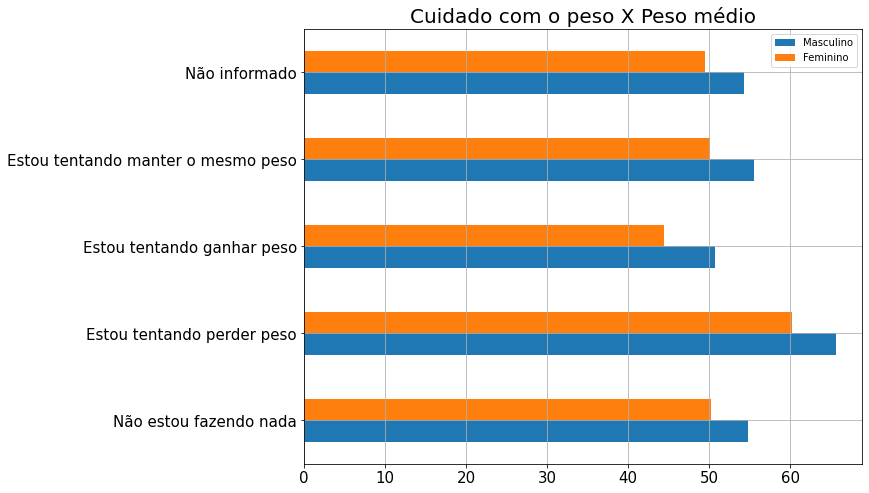

In [ ]:
cuidado_peso.plot(kind='barh', figsize=(10, 8), fontsize=15, grid=True)
plt.title('Cuidado com o peso X Peso médio', fontsize=20)
plt.ylabel('')
plt.show()

In [ ]:
comeu_fora = {
1:	'Não comi em restaurantes fast food nos últimos 7 dias (0 dia)',
2:	'1 dia nos últimos 7 dias',
3:	'2 dias nos últimos 7 dias',
4:	'3 dias nos últimos 7 dias',
5:	'4 dias nos últimos 7 dias',
6:	'5 dias nos últimos 7 dias',
7:	'6 dias nos últimos 7 dias',
8:	'Todos os dias nos últimos 7 dias',
99:	'Não informado'}

In [ ]:
comeu_fora_imc = round(pd.crosstab(dados['VB02023'], dados['classificacao_imc'],
                             normalize='columns',
                             rownames=['NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu em restaurantes fast food, tais como lanchonetes, barracas de cachorro quentes, pizzaria etc?']) * 100, 2)
comeu_fora_imc.rename(index=comeu_fora, inplace=True)
comeu_fora_imc

classificacao_imc,Muito abaixo do peso,Abaixo do peso,Peso normal,Acima do peso,Obesidade I,Obesidade II (severa),Obesidade III (móribida)
"NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu em restaurantes fast food, tais como lanchonetes, barracas de cachorro quentes, pizzaria etc?",,,,,,,
Não comi em restaurantes fast food nos últimos 7 dias (0 dia),54.55,53.18,50.92,55.33,60.12,63.11,59.52
1 dia nos últimos 7 dias,20.67,20.01,20.93,20.37,18.81,17.48,11.90
2 dias nos últimos 7 dias,10.09,10.59,11.71,11.01,10.43,8.74,9.52
3 dias nos últimos 7 dias,5.06,6.53,6.63,5.56,4.09,5.83,9.52
4 dias nos últimos 7 dias,3.07,3.44,3.47,2.61,3.07,2.91,4.76
5 dias nos últimos 7 dias,2.12,2.19,2.20,1.93,1.02,0.00,2.38
6 dias nos últimos 7 dias,1.45,1.29,1.52,1.19,1.02,0.00,2.38
Todos os dias nos últimos 7 dias,2.70,2.66,2.39,1.70,1.23,1.94,0.00
Não informado,0.29,0.12,0.23,0.28,0.20,0.00,0.00


In [ ]:
dic_auto_image = {
1:	'Muito satisfeito(a)',
2:	'Satisfeito(a)',
3:	'Indiferente',
4:	'Insatisfeito(a)',
5:	'Muito insatisfeito(a)',
99:	'Não informado'}

In [ ]:
auto_imagem = round(pd.crosstab(dados['VB11007'], dados['classificacao_imc'], 
                                normalize='index',
                                rownames=['Como você se sente em relação ao seu corpo?'],
                                colnames=['IMC']) * 100, 2)
auto_imagem.rename(index=dic_auto_image, inplace=True)
auto_imagem

IMC,Muito abaixo do peso,Abaixo do peso,Peso normal,Acima do peso,Obesidade I,Obesidade II (severa),Obesidade III (móribida)
Como você se sente em relação ao seu corpo?,,,,,,,
Muito satisfeito(a),19.94,18.68,53.47,6.45,1.24,0.13,0.09
Satisfeito(a),13.60,15.98,60.07,8.21,1.65,0.39,0.10
Indiferente,12.51,12.95,52.30,15.05,5.42,1.22,0.55
Insatisfeito(a),8.94,10.49,52.41,19.65,6.66,1.33,0.52
Muito insatisfeito(a),12.04,11.76,42.44,21.57,8.82,2.24,1.12
Não informado,16.02,16.57,57.46,7.73,1.10,0.55,0.55


# **4 Histograma e Boxplot**

##Desafio 7 - Calcular o desvio padrão, média, moda e mediana e plotar no gráfico de histograma.

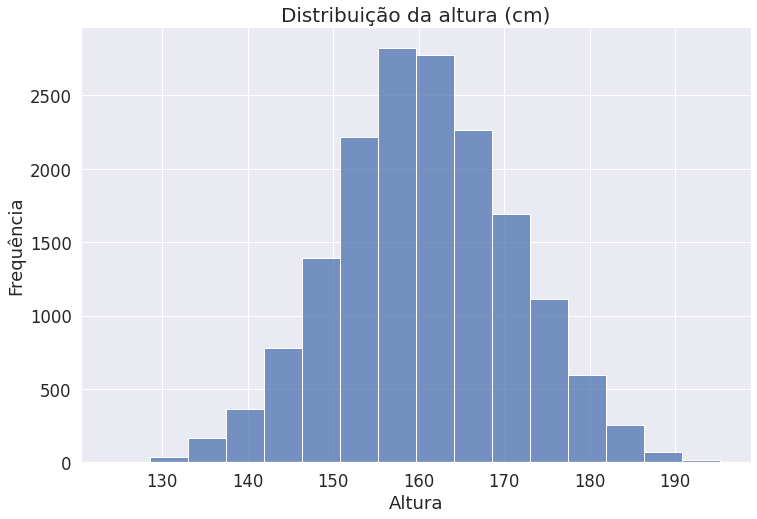

In [ ]:
sns.set(font_scale=1.5)
ax = sns.histplot(data=dados, x='VB17004', bins='sturges')
ax.figure.set_size_inches(12, 8)
ax.set_title('Distribuição da altura (cm)', fontsize=20)
ax.set_xlabel('Altura')
ax.set_ylabel('Frequência')
ax;

In [ ]:
dados['VB17004'].std() + dados['VB17004'].mean()

171.05318330461597

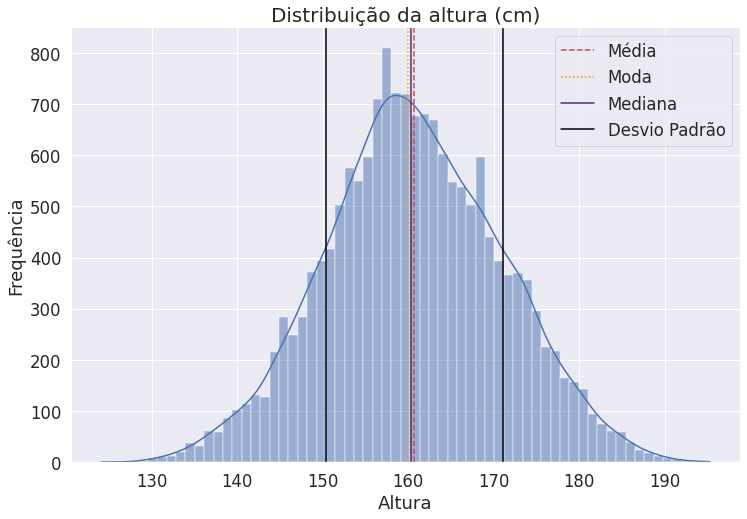

In [ ]:
sns.set(font_scale=1.5)
ax = sns.histplot(data=dados, x='VB17004', kde=True)
ax.figure.set_size_inches(12, 8)
ax.set_title('Distribuição da altura (cm)', fontsize=20)
ax.set_xlabel('Altura')
ax.set_ylabel('Frequência')
plt.axvline(x=dados['VB17004'].mean(), color='r', label='Média', linestyle='--')
plt.axvline(x=dados['VB17004'].mode().values, color='#ff9400', label='Moda', 
            linestyle=':')
plt.axvline(x=dados['VB17004'].median(), color='#552b70', label='Mediana')
plt.axvline(x=dados['VB17004'].std() + dados['VB17004'].mean(), color='#000000', 
            label='Desvio Padrão')
plt.axvline(x=dados['VB17004'].mean() - dados['VB17004'].std(), color='#000000')
plt.legend()
ax;

In [ ]:
fig_altura = go.Figure()

fig_altura.add_trace(go.Histogram(x=dados['VB17004']))


fig_altura.update_layout(title='Altura dos estudantes - PeNSE(2015)',
                         xaxis_title_text='Altura',
                         yaxis_title_text='Frequência')

fig_altura.add_trace(go.Line(name='Media', 
                             x=[dados['VB17004'].mean()]))

fig_altura.show()

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
fig_altura_2 = px.histogram(dados, x='VB17004', title='Altura dos estudantes - PeNSE (2015)',
                            labels={'VB17004': 'Altura'})


fig_altura_2.update_layout(yaxis_title_text='Frequência')

fig_altura_2.add_trace(
    go.Scatter(
        x=[dados['VB17004'].mean(), dados['VB17004'].mean()],
        y=[0, 420],
        mode="lines",
        line=go.scatter.Line(color="black"),
        showlegend=True,
        name=f'Media {round(dados["VB17004"].mean(), 1)}'))

fig_altura_2.add_trace(
    go.Scatter(
        x=[dados['VB17004'].median(), dados['VB17004'].median()],
        y=[0, 420],
        mode="lines",
        line=go.scatter.Line(color="red"),
        showlegend=True,
        name=f'Mediana {round(dados["VB17004"].median(), 1)}'))

fig_altura_2.add_trace(
    go.Scatter(
        x=[float(dados["VB17004"].mode()), float(dados["VB17004"].mode())],
        y=[0, 420],
        mode="lines",
        line=go.scatter.Line(color="green"),
        showlegend=True,
        name=f'Moda {float(dados["VB17004"].mode())}'))

fig_altura_2.add_trace(
    go.Scatter(
        x=[dados['VB17004'].std() + dados['VB17004'].mean(), 
           dados['VB17004'].std() + dados['VB17004'].mean()],
        y=[0, 420],
        mode="lines",
        line=go.scatter.Line(color="yellow"),
        showlegend=True,
        name=f'Desvio Padrao {round(dados["VB17004"].std(), 1)}'))

fig_altura_2.add_trace(
    go.Scatter(
        x=[dados['VB17004'].mean() - dados['VB17004'].std(), 
           dados['VB17004'].mean() - dados['VB17004'].std()],
        y=[0, 420],
        mode="lines",
        line=go.scatter.Line(color="yellow"),
        showlegend=False,
        name='Desvio Padrao'))

fig_altura_2.show()

In [ ]:
float(dados["VB17004"].mode())

160.0

In [ ]:
dados["VB17004"].mean()

160.71311307078818

##Desafio 8 - Fazer a análise com o histograma para outras informações da base de dados.

In [ ]:
fig_peso = px.histogram(dados, x='VB17003', title='Peso dos estudantes - PeNSE (2015)',
                            labels={'VB17003': 'Peso (KG)'})


fig_peso.update_layout(yaxis_title_text='Frequência')

fig_peso.add_trace(
    go.Scatter(
        x=[dados['VB17003'].mean(), dados['VB17003'].mean()],
        y=[0, 600],
        mode="lines",
        line=go.scatter.Line(color="black"),
        showlegend=True,
        name=f'Media {round(dados["VB17003"].mean(), 2)}'))

fig_peso.add_trace(
    go.Scatter(
        x=[dados['VB17003'].median(), dados['VB17003'].median()],
        y=[0, 600],
        mode="lines",
        line=go.scatter.Line(color="red"),
        showlegend=True,
        name=f'Mediana {round(dados["VB17003"].median(), 2)}'))

fig_peso.add_trace(
    go.Scatter(
        x=[float(dados['VB17003'].mode()), float(dados['VB17003'].mode())],
        y=[0, 600],
        mode="lines",
        line=go.scatter.Line(color="green"),
        showlegend=True,
        name=f'Moda {float(dados["VB17003"].mode())}'))

fig_peso.add_trace(
    go.Scatter(
        x=[dados['VB17003'].std() + dados['VB17003'].mean(), 
           dados['VB17003'].std() + dados['VB17003'].mean()],
        y=[0, 600],
        mode="lines",
        line=go.scatter.Line(color="yellow"),
        showlegend=True,
        name=f'Desvio Padrao {round(dados["VB17003"].std(), 2)}'))

fig_peso.add_trace(
    go.Scatter(
        x=[dados['VB17003'].mean() - dados['VB17003'].std(), 
           dados['VB17003'].mean() - dados['VB17003'].std()],
        y=[0, 600],
        mode="lines",
        line=go.scatter.Line(color="yellow"),
        showlegend=False,
        name='Desvio Padrao'))

fig_peso.show()

##Desafio 9 - Pesquisar como é determinado os outliers no boxplot do seaborn. Calcular na mão utilizando a função .quantile()

O boxplot do Seaborn utiliza uma formula chamada [inter-quartile range](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=seaborn%20boxplot#seaborn.boxplot) para determinação dos outliers. 

In [ ]:
terceiro_quartil_altura = dados['VB17004'].quantile(0.75)
segundo_quartil_altura = dados['VB17004'].quantile(0.25)
intervalo_inter_quartil_altura = terceiro_quartil_altura - segundo_quartil_altura
intervalo_inter_quartil_altura

14.099999999999994

Outliers menores que a mediana:
E o segundo quartil menos o intervalo inter-quartil e meio.

Outliers maiores do que a mediana:
E o terceiro quartil mais o intervalo inter-quartil e meio.

In [ ]:
outlier_esquerdo = segundo_quartil_altura - 1.5 * intervalo_inter_quartil_altura
outlier_esquerdo

132.65000000000003

In [ ]:
outlier_direito = terceiro_quartil_altura + 1.5 * intervalo_inter_quartil_altura
outlier_direito

189.05

As alturas menores do que 132.65 centimetros e maiores do que 189.05 centimetros sao consideradas outliers.

In [ ]:
dados['VB17004'].min()

124.1

In [ ]:
dados['VB17004'].max()

195.3

# **5 Medidas de centralidade e dispersao**

As medidas de centralidade sao:

Media: Soma dos elementos dividido pelo numero de elementos de uma frequencia.

Mediana: Numero que divide a frequencia no meio, ficando 50% menores do que a mediana e 50% maiores.

Desvio padrao: Numero que representa o quanto a distribuicao de frequencia se dispersa da media, quanto maior o desvio padrao maior a dispersao da frequencia.

Quartil: Divisao da distrbuicao  de frequencia em quatro partes, 25% dos dados e o primeiro quartil, 75% dos dados representam o terceiro quartil.

##Desafio 10 -Fazer a descrição de outras variáveis, analisar e compartilhas suas análises no discord.

In [ ]:
dados['VB01003'].describe()

count    16556.000000
mean        14.095917
std          2.127947
min         11.000000
25%         12.000000
50%         14.000000
75%         16.000000
max         19.000000
Name: VB01003, dtype: float64

O metodo describe retorna dados estatisticos descritivos, onde:

count: numero de elementos na distribuicao

mean: Media da distribuicao, sendo 14 anos para a variavl idade

std: Desvio padrao 

min: valor minimo

25%: primeiro quartil, 25% das idades sao menores do que 12 anos de idade.

50%: Mediana, ou segundo quartil, 50% das idades sao mmenres do que 14 anos.

75%: Terceiro quartil, 75% das idades sao menres do que 16 anos.

max: Maior idade na distribuicao de frequencia.

In [ ]:
dados['VB01003'].mode()

0    12
dtype: int64

A moda das idades trata se da idade que mais se repete na distribuicao de frequencia.

Uma distrbuicao normal ira possuir a media, mediana e moda com valores iguais.

Text(0.5, 0, 'Idade')

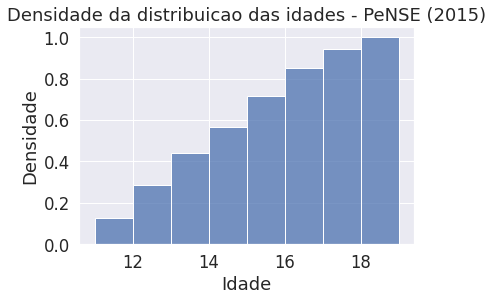

In [ ]:
sns.histplot(x='VB01003', data = dados, stat='density', cumulative=True, bins=8)
plt.title('Densidade da distribuicao das idades - PeNSE (2015)')
plt.ylabel('Densidade')
plt.xlabel('Idade')

A distribuicao de frequencia por densidade normaliza a distribuicao a area do grafico, onde e possivel notar a mediana e os quartis por meio doo eixo y, onde 0.2 ou 20% das idades sao menores do que 12 anos.

##Desafio 11 - Fazer o calculo da média por sexo e idade, através do crosstab

In [ ]:
pd.crosstab(columns=dados['VB01001'], index=dados['VB01003'], 
            values=dados['VB17003'], aggfunc='mean')

VB01001,1,2
VB01003,,
11,42.530893,43.310605
12,47.016019,48.472532
13,52.321407,51.624820
14,57.890739,54.237782
15,62.315036,56.203367
16,64.673558,56.952231
17,67.892061,58.133201
18,67.562281,57.694118
19,69.146842,60.507018


Peso dos estudantes por sexo e idade.

##Super-desafio 2: De alguma maniera sumarizar as perguntas para ficar mais curta. NLTK, GESIM...

In [ ]:
perguntas_lista = ['Prezado(a) estudante, você concorda em participar dessa pesquisa?',
             'Qual o grau de escolaridade mais elevado que você pretendo concluir?',
             'Você costuma comer a comida (merenda/almoço) oferecida pela escola? (Não considerar lanches/comida comprados na cantina).',
             'NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu pelo menos um tipo de legume ou verdura? Exemplos: alface, abóbora, brócolis, cebola, cenoura, chuchu, couve, espinafre, pepino, tomate etc. Não inclua batata e aipim (mandioca/macaxeira).',
             'Qual é a sua cor ou raça?']

In [ ]:
#Testando novas perguntas por tageamento
def sintetizando_pergunta_lista(perguntas):
  seq = 0
  for i in perguntas:
    palavras = []
    tokens = nltk.word_tokenize(i.capitalize())
    tags = nltk.pos_tag(tokens)
    for i in tags:
      if i[1] in ['NN']:
        palavras.append(i[0])
    perguntas[seq] = '_'.join(palavras[:7]).upper()             
    seq += 1
  return perguntas

In [ ]:
perguntas_lista =  sintetizando_pergunta_lista(perguntas_lista)
perguntas_lista

['ESTUDANTE_CONCORDA_EM_PARTICIPAR_DESSA_PESQUISA',
 'O_GRAU_QUE_PRETENDO_CONCLUIR',
 'COSTUMA_COMER_COMIDA_MERENDA/ALMOÇO_OFERECIDA_PELA_ESCOLA',
 'COMEU_PELO_TIPO_VERDURA_EXEMPLOS_ALFACE_ABÓBORA',
 'COR_OU_RAÇA']

##Super-desafio 1: Criar um dicionário para facilitar a busca da pergunta.

###Solucao 1

Solucao copiando e colando do excel

In [ ]:
questionario_aluno = {
    
'Região geográfica': ['REGEOGR', {	
1:	'Norte',
2:	'Nordeste',
3:	'Sudeste',
4:	'Sul',
5:	'Centro-Oeste'}],

'Qual é o seu sexo?': ['VB01001', {
1:	'Masculino',
2:	'Feminino'}]}

In [ ]:
questionario_aluno

{'Qual é o seu sexo?': ['VB01001', {1: 'Masculino', 2: 'Feminino'}],
 'Região geográfica': ['REGEOGR',
  {1: 'Norte', 2: 'Nordeste', 3: 'Sudeste', 4: 'Sul', 5: 'Centro-Oeste'}]}

###Solucao 2

Solucao capturando as informacoes do DataFrame

####Visualizacao e definicao da logica de resolucao

In [ ]:
questionario_aluno_df.head()

,VARIÁVEL,QUESTIONÁRIO DO ALUNO
0,ANOPESQ,Ano em que a pesquisa foi realizada
1,PAIS,País
2,76,Brasil
3,REGEOGR,Região geográfica
4,1,Norte


In [ ]:
questionario_aluno_df.columns = ['variavel', 'questionario_aluno']

In [ ]:
questionario_aluno_df.head()

,variavel,questionario_aluno
0,ANOPESQ,Ano em que a pesquisa foi realizada
1,PAIS,País
2,76,Brasil
3,REGEOGR,Região geográfica
4,1,Norte


In [ ]:
#Verificacao dos tipos dos dados
questionario_aluno_df.dtypes

variavel              object
questionario_aluno    object
dtype: object

In [ ]:
#Conversao dos tipos para str
questionario_aluno_df = questionario_aluno_df.astype('str')

In [ ]:
questionario_aluno_df.dtypes

variavel              object
questionario_aluno    object
dtype: object

Observacoes:

No DataFrame o codigo da pergunta vem antes do texto da pergunta;

O codigo da pergunta esta com as letras todas em maiusculo;

O codigo da pergunta e o numero da opcao de resposta estao na primeira coluna;

A pergunta e a opcao de resposta estao na segunda coluna do Data Frame;

Objetivo: Selecionar as informacoes do DataFrame e passar para a seguinte estrutura:

dicionario = {
  pergunta: [codigo, {numero: opcao}],
  pergunta: [codigo, {numero: opcao}],
  ...}

Alternativa 1:

Colocar dentro de listas todas as informacoes do Data Frame para depois reordena-las como no modelo acima.

####Capturando codigos e descricao das perguntas

In [ ]:
#Capturando os codigos das perguntas
codigos_perguntas = []
descricao_perguntas = []
linha = 0

for i in questionario_aluno_df['variavel']:
  if i.isupper():
    codigos_perguntas.append(i)
    questionario_aluno_df['questionario_aluno'][linha] = questionario_aluno_df['questionario_aluno'][linha].upper()
    descricao_perguntas.append(questionario_aluno_df['questionario_aluno'][linha])
  linha += 1  

In [ ]:
codigos_perguntas[:5]

['ANOPESQ', 'PAIS', 'REGEOGR', 'VB00004', 'VB01001']

In [ ]:
codigos_perguntas[-5:]

['PESO', 'V0006', 'V0007', 'V0008', 'V0041']

In [ ]:
descricao_perguntas[:5]

['ANO EM QUE A PESQUISA FOI REALIZADA',
 'PAÍS',
 'REGIÃO GEOGRÁFICA',
 'PREZADO(A) ESTUDANTE, VOCÊ CONCORDA EM PARTICIPAR DESSA PESQUISA?',
 'QUAL É O SEU SEXO?']

In [ ]:
descricao_perguntas[-5:]

['PESO DO ALUNO DE ACORDO COM A AMOSTRA, UTILIZADO PARA EXPANSÃO',
 'SITUAÇÃO DA ESCOLA',
 'DEPENDÊNCIA ADMINISTRATIVA DA ESCOLA',
 'ESFERA ADMINISTRATIVA DA ESCOLA',
 'TIPO DE ESCOLA PRIVADA']

######Sumarizando perguntas

In [ ]:
descricao_perguntas = sintetizando_pergunta_lista(descricao_perguntas)

In [ ]:
descricao_perguntas

['PESQUISA_FOI_REALIZADA',
 'PAÍS',
 'GEOGRÁFICA',
 'ESTUDANTE_CONCORDA_EM_PARTICIPAR_DESSA_PESQUISA',
 'O_SEU_SEXO',
 'COR_OU_RAÇA',
 'SUA_IDADE',
 'O_MÊS_ANIVERSÁRIO',
 'QUE_ANO_VOCÊ_NASCEU',
 'QUE_ANO/SÉRIE_VOCÊ_ESTÁ',
 'QUE_TURNO_VOCÊ_ESTUDA',
 'REGIME_MAIS_HORAS_DIÁRIAS_DURANTE_TODO_O',
 'REGIME_INTERNATO_ESCOLA_POSSUI_OS_DORMEM_DIARIAMENTE',
 'O_GRAU_QUE_PRETENDO_CONCLUIR',
 'TERMINAR_O_CICLO/CURSO_QUE_VOCÊ_FREQUENTANDO_ATUALMENTE',
 'MÃE',
 'PAI',
 'COM_VOCÊ_PESSOAS_MORAM_CASA_APARTAMENTO',
 'SUA_CASA_TEM_TELEFONE_FIXO',
 'TEM_CELULAR',
 'SUA_CASA_TEM_COMPUTADOR_NETBOOK_LAPTOP',
 'TEM_ACESSO_INTERNET_EM_SUA_CASA',
 'QUE_MORA_TEM_CARRO',
 'QUE_MORA_TEM_MOTO',
 'COM_CHUVEIRO_TÊM_DENTRO_DA_SUA_CASA',
 'EMPREGADO_DOMÉSTICO_RECEBENDO_DINHEIRO_PARA_FAZER_TRABALHO',
 'NÍVEL_GRAU_SUA_MÃE_ESTUDOU_ESTUDA',
 'TEM_ALGUM_TRABALHO_OU_NEGÓCIO_ATUALMENTE',
 'RECEBE_DINHEIRO_POR_ESTE_TRABALHO_OU_NEGÓCIO',
 'COSTUMA_TOMAR_O_CAFÉ_DA_MANHÃ',
 'COSTUMA_ALMOÇAR_JANTAR_COM_SUA_MÃE_PAI',
 'COSTUMA_COME

####Capturando opcoes de resposta

In [ ]:
opcoes_resposta = []
linha = 0

for i in questionario_aluno_df['variavel']:
  if i.isdigit() or i == '-1' or i == '0 a 2999':
    opcoes_resposta.append(i)
    opcoes_resposta.append(questionario_aluno_df['questionario_aluno'][linha])
  linha += 1

In [ ]:
opcoes_resposta[:5]

['76', 'Brasil', '1', 'Norte', '2']

In [ ]:
opcoes_resposta[-5:]

['Comunitária', '3', 'Confessional', '4', 'Filantrópica']

#### Reordenando as informacoes no dicionario

Modelo: dicionario = {
  pergunta: [codigo, {numero: opcao}],
  pergunta: [codigo, {numero: opcao}],
  ...}

modelo: dicionario_variaveis = {
  descricao_perguntas: [codigos_perguntas, {opcoes_resposta[0]: opcoes_resposta[1]}

Percorrer a primeira coluna do DataFrame com as informacoes do dicionario de variaveis para selecionar as informacoes das listas.

#####As tres ultimas linhas foram ignoradas na captura das listas

In [ ]:
questionario_aluno_df.tail()

,variavel,questionario_aluno
1213,3,Confessional
1214,4,Filantrópica
1215,aluno,contador de aluno
1216,escola,UPA (unidade primária de amostragem)
1217,turma,USA (unidade secundária de amostragem)


##### Dicionario de variaveis

In [ ]:

dicionario_variaveis = {}


item_descricao_pergunta = item_codigo_pergunta = item_opcao_resposta = 0

for i in questionario_aluno_df['variavel'][:-3]:
  if i.isupper():
    dicionario_variaveis[descricao_perguntas[item_descricao_pergunta]] = [codigos_perguntas[item_codigo_pergunta]]
    dicionario_variaveis[descricao_perguntas[item_descricao_pergunta]].append(dict())
    item_descricao_pergunta += 1
    item_codigo_pergunta += 1
  else:
    dicionario_variaveis[descricao_perguntas[item_descricao_pergunta - 1]][1].update({
    opcoes_resposta[item_opcao_resposta]: opcoes_resposta[item_opcao_resposta + 1]})
    item_opcao_resposta += 2

In [ ]:
dicionario_variaveis['COMEU_FEIJÃO']

['VB02001',
 {'1': 'Não comi feijão nos últimos 7 dias (0 dia)',
  '2': '1 dia nos últimos 7 dias ',
  '3': '2 dias nos últimos 7 dias ',
  '4': '3 dias nos últimos 7 dias ',
  '5': '4 dias nos últimos 7 dias ',
  '6': '5 dias nos últimos 7 dias ',
  '7': '6 dias nos últimos 7 dias ',
  '8': 'Todos os dias nos últimos 7 dias',
  '99': 'Não informado'}]

A sumarização das perguntas em alguns casos dificulta o entendimento ou muda o sentido da questão.